Vi begynner med å gjøre noen imports som er nødvendige for resten av koden i denne fila. Denne kan du bare kjøre uten å tenke så mye mer over hva den gjør 😉

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

## Lineær regresjon

Vi begynner med å ta en titt på den aller enkleste formen for regresjon, som mange av oss nok har hatt om i matematikk på videregående; nemlig linear regresjon. Dette lar oss tilpasse en rett linje til et datasett – med andre ord ikke en veldig kraftig modell. Fordelen er at dette er et matematisk enkelt problem, som kan løses analytisk.

### Datalasting
Vi begynner med å laste inn datasettet. Vi skal her se på et datasett om været i den ungarske byen Szeged i perioden 2006-2016 (https://www.kaggle.com/datasets/budincsevity/szeged-weather).

Kjør de to neste blokkene for å laste ned datafilen, laste den med pandas, og printe de første linjene slik at vi kan bli litt kjent med hva den inneholder.

In [ ]:
!wget https://github.com/eivindlie/ml-workshop-2025/raw/refs/heads/main/data/weather-in-szeged/weatherHistory.csv

--2025-03-15 11:07:24--  https://github.com/eivindlie/ml-workshop-2025/raw/refs/heads/main/data/weather-in-szeged/weatherHistory.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eivindlie/ml-workshop-2025/refs/heads/main/data/weather-in-szeged/weatherHistory.csv [following]
--2025-03-15 11:07:24--  https://raw.githubusercontent.com/eivindlie/ml-workshop-2025/refs/heads/main/data/weather-in-szeged/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 

In [ ]:
df_weather = pd.read_csv("weatherHistory.csv")
df_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Dette er et forholdsvis stort datasett, så vi velger ut bare data fra 2010 for å gjøre det litt mer håndterbart.

In [ ]:
df_2010 = df_weather[(df_weather['Formatted Date'] >= '2010-01-01') & (df_weather['Formatted Date'] <= '2010-12-31')]


### Utforskende plots
Vi ser at datasettet inneholder tidsseriedata om været i byen, med blant annet faktisk temperatur, opplevd temperatur og luftfuktighet. La oss ta en titt på hvordan forholdet mellom temperatur og luftfuktighet ser ut, og det samme for faktisk temperatur og opplevd temperatur.

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

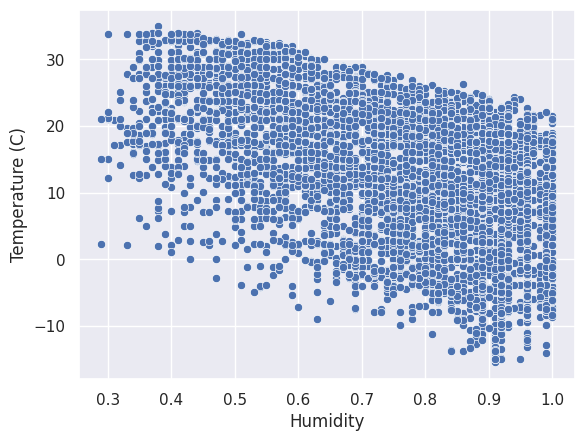

In [ ]:
sns.scatterplot(data=df_2010, x='Humidity', y='Temperature (C)')

<Axes: xlabel='Apparent Temperature (C)', ylabel='Temperature (C)'>

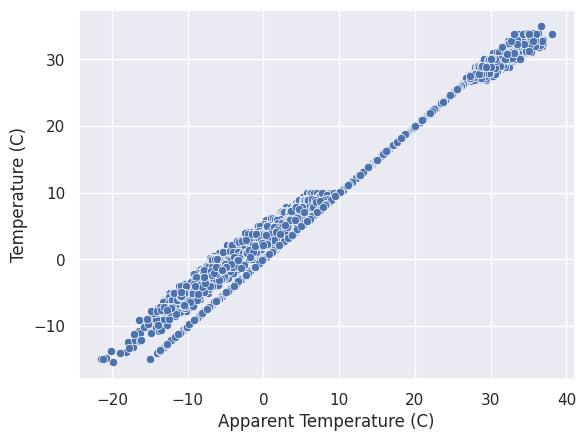

In [ ]:
sns.scatterplot(data=df_2010, x='Apparent Temperature (C)', y='Temperature (C)')

Her ser vi hvor mye informasjon et enkelt scatter plot kan gi for enkle sammenhenger som dette her. Vi ser at det er en viss lineær korrelasjon mellom temperatur og luftfuktighet, og en kraftig korrelasjon mellom opplevd temperatur og faktisk temperatur. La oss tilpasse en lineær modell for begge forholdene!

### Tilpassing av modell

In [ ]:
humidity_model = sklearn.linear_model.LinearRegression()
humidity_model.fit(df_2010[['Humidity']], df_2010['Temperature (C)'])

LinearRegression()

In [ ]:
temp_model = sklearn.linear_model.LinearRegression()
temp_model.fit(df_2010[['Apparent Temperature (C)']], df_2010['Temperature (C)'])

LinearRegression()

### Plotting av resultat

Vi kan nå gjenta de samme plottene sammen med linjen som modellen vår predikerer for å se hvordan modellen treffer:

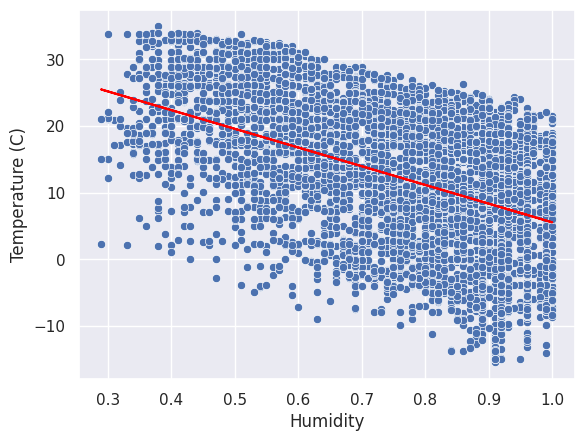

In [ ]:
humidity_pred = humidity_model.predict(df_2010[['Humidity']])
sns.scatterplot(data=df_2010, x='Humidity', y='Temperature (C)')
plt.plot(df_2010['Humidity'], humidity_pred, color='red')

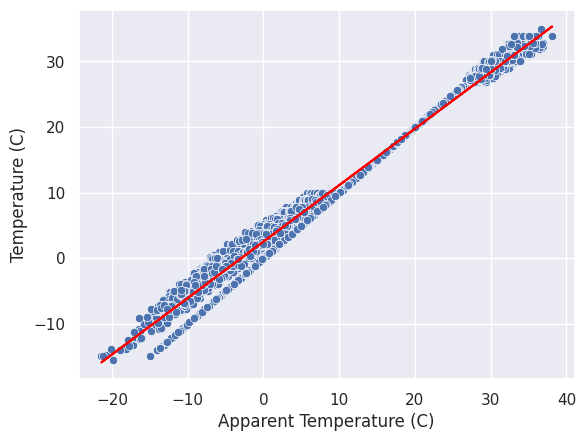

In [ ]:
temp_pred = temp_model.predict(df_2010[['Apparent Temperature (C)']])
sns.scatterplot(data=df_2010, x='Apparent Temperature (C)', y='Temperature (C)')
plt.plot(df_2010['Apparent Temperature (C)'], temp_pred, color='red')

### Generalisering til nye observasjoner

Siden vi valgte ut kun 2010-dataene for å tilpasse modellene, har vi nå muligheten til å sjekke om modellen har fanget et forhold som er generaliserbart til andre år. La oss gjenta de samme plottene for 2011:

In [ ]:
df_2011 = df_weather[(df_weather['Formatted Date'] >= '2011-01-01') & (df_weather['Formatted Date'] <= '2011-12-31')]

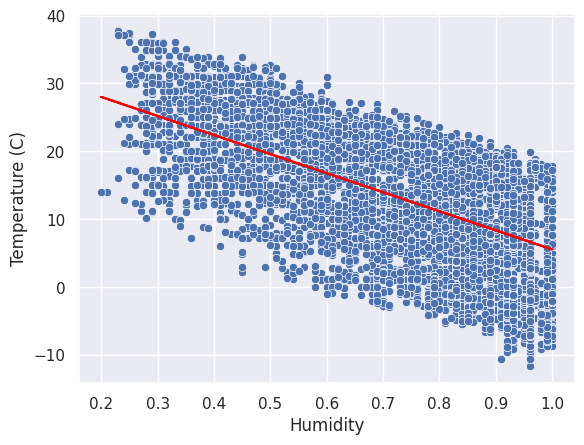

In [ ]:
humidity_pred_2011 = humidity_model.predict(df_2011[['Humidity']])
sns.scatterplot(data=df_2011, x='Humidity', y='Temperature (C)')
plt.plot(df_2011['Humidity'], humidity_pred_2011, color='red')

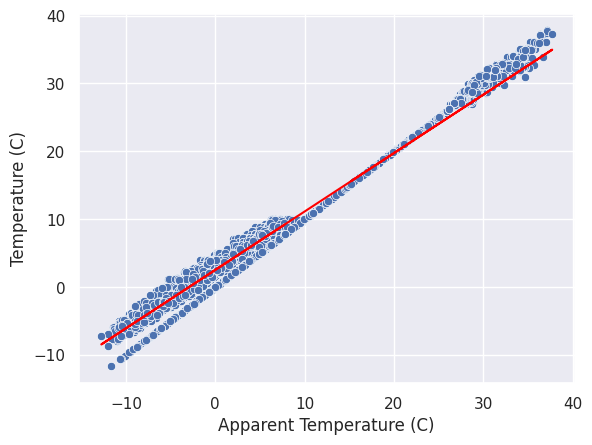

In [ ]:
temp_pred_2011 = temp_model.predict(df_2011[['Apparent Temperature (C)']])
sns.scatterplot(data=df_2011, x='Apparent Temperature (C)', y='Temperature (C)')
plt.plot(df_2011['Apparent Temperature (C)'], temp_pred_2011, color='red')

Det ser ut til at modellene våre har fanget en sammenheng som treffer godt også i et år vi ikke brukte under tilpasningen av modellene.

### Ekstraoppgave 1
Vi har nå sett på lineære forhold mellom noen av dataene i datasettet. Det finnes flere data som vi ikke har utforsket. Finnes det noen av disse du tror kan være interessante for en liknende analyse? Lag noen plott og tilpass modeller der du tror det kan passe.

### Ekstraoppgave 2
Vi brukte her scatter plots, som er en effektiv visuell måte å undersøke forholdet mellom to variabler. For lineær korrelasjon finnes også Pearsons korrelasjonskoeffisient, som er et tall som angir hvor godt sammenhengen mellom to variabler passer til en rett linje. Undersøk hvordan du kan regne ut denne med sklearn. Kanskje du kan lage en matrise som viser forholdet mellom alle par av variabler, og på den måten raskt se hvilke sammenhenger som kan være interessant å undersøke nærmere?

## Multippel lineær regresjon
I forrige seksjon så vi på enkel lineær regresjon, der vi prøver å finne et forhold mellom to variabler. Noen ganger kan det være at flere forklaringsvariabler til sammen kan gi en bedre prediksjon for en gitt responsvariabel. Hvis vi antar at dette forholdet fortsatt er lineært kan vi bruke multippel lineær regresjon for å finne dette forholdet.

### Datalasting
Datasettet vi skal se på nå er en oversikt over hvor godt studenter gjør det akademisk, sammen med en del andre variabler, som hvor mye de studerer, hvor mye søvn de i snitt får hver natt, osv. Datasettet er syntetisk, men gir oss en god mulighet til å trene på å finne sammenhenger.

In [1]:
!wget https://github.com/eivindlie/ml-workshop-2025/raw/refs/heads/main/data/student-performance/Student_Performance.csv

--2025-03-16 10:43:03--  https://github.com/eivindlie/ml-workshop-2025/raw/refs/heads/main/data/student-performance/Student_Performance.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eivindlie/ml-workshop-2025/refs/heads/main/data/student-performance/Student_Performance.csv [following]
--2025-03-16 10:43:03--  https://raw.githubusercontent.com/eivindlie/ml-workshop-2025/refs/heads/main/data/student-performance/Student_Performance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175071 (171K) [text/plain]
Saving to: ‘Student_Performance.csv’

Student_Performance 100%[===================>]

In [3]:
df_student = pd.read_csv("Student_Performance.csv")
df_student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Preprosessering
Ganske ofte er det behov for å endre litt på datasettet vårt for å gjøre det lettere å utføre modellering, og for å forbedre kvaliteten på resultatet. I dette datasettet ser vi at det finnes et felt "Extracurricular Activities" som har tekstverdier. Dette passer dårlig til regresjon, og den enkleste løsningen på dette er å mappe disse verdiene til tallverdier i stedet.

In [7]:
df_student['Extracurricular Activities'] = pd.Categorical(df_student['Extracurricular Activities'])
df_student['Extracurricular Activities'] = df_student['Extracurricular Activities'].cat.codes
df_student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### Datautforskning
Vi har flere valgmuligheter for forklaringsvariabler her, og det lønner seg sjelden å ukritisk bruke alle. Vi vil derfor gjøre oss litt kjent med de forskjellige for å velge ut riktige.

> *I de neste blokkene utforsker vi de forskjellige variablene, og gjør et enkelt utvalg av noen for å prøve å tilpasse en modell. Det er langt i fra sikkert at det er de beste variablene som er valgt ut her – jeg oppfordrer deg til å gjøre din egen analyse og se om du kan tilpasse en bedre modell ved å velge andre variabler!*

Vi begynner med å plotte en korrelasjonsmatrise, som gir oss Persons korrelasjonskoeffisient mellom alle par av variabler. Dette beskriver i hvor stor grad det er en lineær sammenheng mellom to og to variabler.

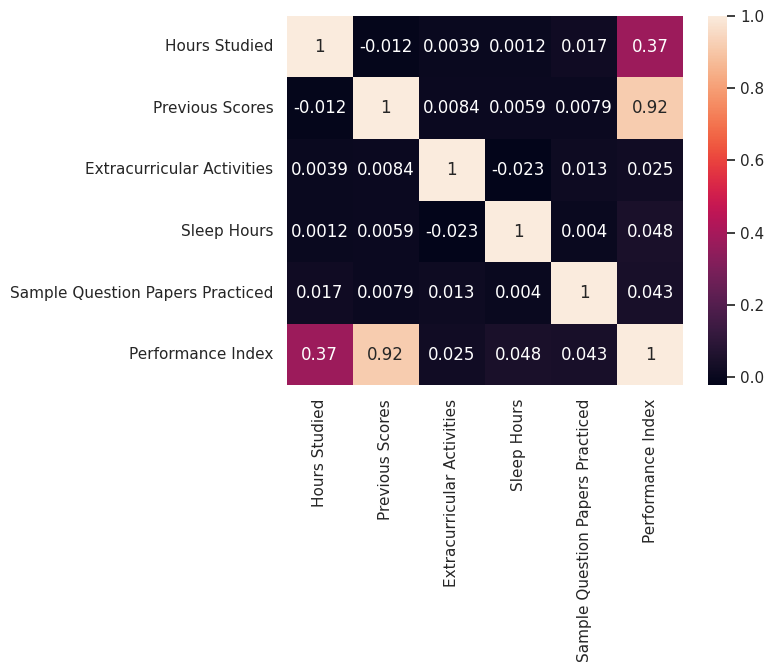

In [13]:
sns.heatmap(df_student.corr(), annot=True)
plt.show()

Siden det er "Performance Index" vi vil predikere, er det variabler som forklarer denne som vi er mest interessert i. Her ser det ut til at "Hours Studied" og "Previous Scores" er de mest lovende variablene! Vi ser også at det finnes svake korrelasjoner til alle de andre variablene også, så kanskje det er mulig å hente noe ut av dette også, selv om de to nevnte dominerer ganske kraftig.

Desto flere variabler vi tilfører, desto vanskeligere blir det å lage gode illustrasjoner – men med to forklaringsvariabler og én responsvariabel klarer vi fortsatt å lage et scatterplot som er mulig å forstå. La oss se hvordan det blir seende ut med de to variablene vi valgte ut:

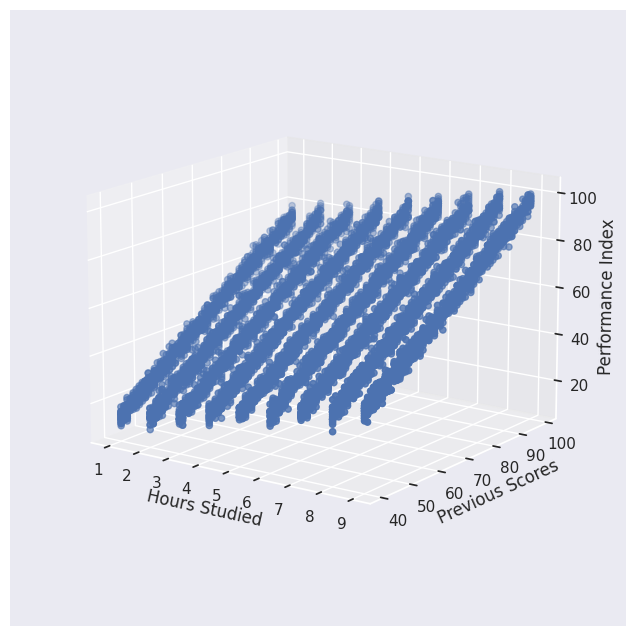

In [52]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_student['Hours Studied'], df_student['Previous Scores'], df_student['Performance Index'])
ax.set_xlabel('Hours Studied')
ax.set_ylabel("Previous Scores")
ax.set_zlabel("Performance Index")
ax.view_init(15, -55, 0)
ax.set_box_aspect(None, zoom=0.85)
plt.show()

3D-plott er vanskeligere å lese enn 2D-plott, men vi ser en tendens mot at høyere antall studietimer og bedre tidligere resultater fører til bedre nåværende resultater.

> *Du stusser kanskje på hvorfor vi får tydelige striper i plottet vårt over. Dette skyldes at ikke alle variablene våre er kontinuerlige. Antall studietimer er tydeligvis kun målt i hele timer, og det blir derfor mellomrom mellom de mulige verdiene for denne variabelen.*

### Splitting av data
I forrige seksjon valgte vi ut kun ett år av værdataene fordi det var lettere å håndtere. Det er ofte god praksis å ikke trene på hele datasettet av en annen grunn: hvis vi beholder en del av datasettet som vi ikke har trent på, kan vi få et riktigere mål på om modellen vår faktisk fanger reelle sammenhenger. Vi splitter derfor datasettet i en trenings- og en testdel. En vanlig fordeling her er 80-20.

> *Hvis du vil lese mer om hvorfor dette er nødvendig, kan du gjøre et søk på **overfitting**, som er det som skjer når en modell tilpasser seg detaljer i et datasett som ikke er generaliserbart til nye observasjoner. Det er dette vi prøver å måle ved å holde til side observasjoner som modellen ikke har sett før, og som vi derfor trygt kan teste på. Overfitting er enda mer aktuelt på kraftigere modeller enn det vi jobber med her.*

In [54]:
df_student_train, df_student_test = sklearn.model_selection.train_test_split(df_student, test_size=0.2)

### Tilpassing av modell
La oss prøve å bygge en modell basert på observasjonene våre over! LinearRegression-klassen fra sklearn som vi brukte i forrige seksjon funker også for flere variabler, så vi bruker denne igjen.

In [53]:
student_model1 = sklearn.linear_model.LinearRegression()
student_model1.fit(df_student_train[['Hours Studied', 'Previous Scores']], df_student_train['Performance Index'])

LinearRegression()

### Plotting av resultat
Siden vi fortsatt opererer i tre dimensjoner, som er innenfor det menneskehjernen klarer å oppfatte, kan vi prøve å lage et plott av modellen vår igjen. Vi lager to separate plots – et for treningssettet, og et for testsettet.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


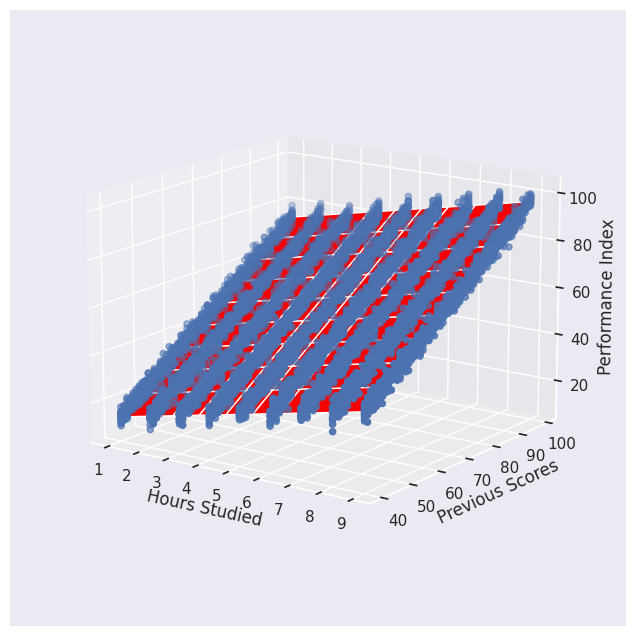

In [80]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

x1 = np.linspace(min(df_student_train['Hours Studied']), max(df_student_train['Hours Studied']), 10)
x2 = np.linspace(min(df_student_train['Previous Scores']), max(df_student_train['Previous Scores']), 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = student_model1.predict(np.c_[x1.ravel(), x2.ravel()])
x3 = x3.reshape(x1.shape)
ax.plot_surface(x1, x2, x3, color='red')

ax.scatter(df_student_train['Hours Studied'], df_student_train['Previous Scores'], df_student_train['Performance Index'])

ax.set_xlabel('Hours Studied')
ax.set_ylabel("Previous Scores")
ax.set_zlabel("Performance Index")
ax.view_init(15, -55, 0)
ax.set_box_aspect(None, zoom=0.85)

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


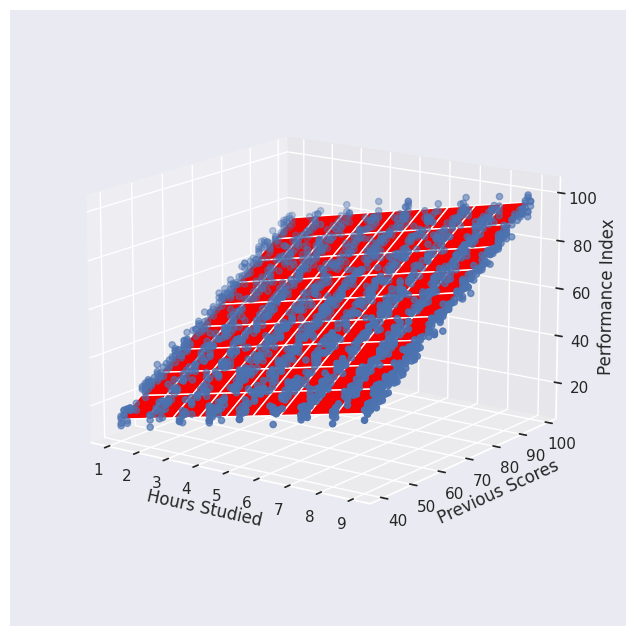

In [81]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

x1 = np.linspace(min(df_student_test['Hours Studied']), max(df_student_test['Hours Studied']), 10)
x2 = np.linspace(min(df_student_test['Previous Scores']), max(df_student_test['Previous Scores']), 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = student_model1.predict(np.c_[x1.ravel(), x2.ravel()])
x3 = x3.reshape(x1.shape)
ax.plot_surface(x1, x2, x3, color='red')

ax.scatter(df_student_test['Hours Studied'], df_student_test['Previous Scores'], df_student_test['Performance Index'])

ax.set_xlabel('Hours Studied')
ax.set_ylabel("Previous Scores")
ax.set_zlabel("Performance Index")
ax.view_init(15, -55, 0)
ax.set_box_aspect(None, zoom=0.85)

plt.show()

Vi ser at vi har klart å finne en modell som ser ut til å passe observasjonene våre godt både for trenings- og testsettet.

> *Er du overrasket over at vi ikke fikk en linje denne gangen? Modellen vår gir nå ut en verdi for hver mulige kombinasjon av "Hours Studied" og "Previous Scores", og dette blir til en 2D-flate i 3D-rommet som utgjøres av disse to variablene og responsvariabelen. Hvis vi hadde tilført enda en forklaringsvariabel hadde modellen utgjort en tredimensjonal figur i et firedimensjonalt rom – men da har vi bevegd oss utenfor det som menneskehjernen klarer å oppfatte, så det blir vanskelig å skulle lage en visualisering av det 😅*

### Vi måler hvor god modellen vår er
Så lenge vi holder oss i dimensjonaliteter og kompleksitet som menneskehjernen henger med på er det nyttig med slike visualiseringer – men det kan også være greit å kunne sette en klarere score på hvor god modellen er. I tillegg er det nyttig om vi klarer å finne et mål som generaliserer til mer komplekse scenarier.

For en regresjonsmodell som dette er et vanlig mål det vi kaller "Mean Square Error" (ofte forkortet MSE), som finner feilen for hver kjente observasjon, tar kvadratet av denne, og regner ut snittet for alle observasjoner. Ved å ta kvadratet sikrer vi at alle feil blir regnet positivt, så feil i motsatt retning ikke kansellerer hverandre. I tillegg vektlegger vi større feil høyere, som ofte gir mening. For lineær regresjon er dette dessuten akkurat det målet vi prøver å minimere.

(Det er også mulig å til slutt ta kvadratroten av MSE, som bringer den tilbake til samme enhet som responsvariabelen. Men som regel behandler vi dette som et enhetsløst tall som vi kun bruker til å sammenlikne modeller, og derfor bryr vi oss som regel ikke om dette.)

La oss regne ut MSE for både trenings- og testsettet:

In [82]:
mse_train = sklearn.metrics.mean_squared_error(df_student_train['Performance Index'], student_model1.predict(df_student_train[['Hours Studied', 'Previous Scores']]))
print(f"MSE for treningssettet: {mse_train}")
mse_test = sklearn.metrics.mean_squared_error(df_student_test['Performance Index'], student_model1.predict(df_student_test[['Hours Studied', 'Previous Scores']]))
print(f"MSE for testsettet: {mse_test}")

MSE for treningssettet: 5.223366771187919
MSE for testsettet: 5.17794725919679


Det er vanskelig å lese disse tallene uten mer kontekst – de er mest nyttig når vi skal sammenlikne flere modeller. Men det vi ser er at det er ganske lik feil for trenings- og testsettet. (Faktisk er testsettet her litt bedre, men det er nok tilfeldig). Dette betyr at modellen vår ikke overfitter, som er positivt.

### Oppgave: Prøv å forbedre modellen
Nå valgte vi ut de to forklaringsvariablene med sterkest korrelasjon til responsvariabelen, og disse dominerte kraftig, så vi kan ikke forvente store forbedringer med å tilføre flere – men litt forbedring er det kanskje mulig å hente ut?

I tillegg ser vi at en av forklaringsvariablene vi brukte er tidligere resultater. Vi kan se for oss scenarier der denne ikke er tilgjengelig, så det kan være interessant å se hva vi kan få til dersom vi later som at denne ikke eksisterer. Klarer vi å nærme oss samme resultater?

Prøv deg fram med å tilpasse andre modeller for studentenes sluttresultat.

> **Du velger selv om du oppretter nye kodeblokker under, eller om du tilpasser koden i blokkene over. Merk at dersom du bruker flere forklaringsvariabler enn 2 vil ikke plottene funke – men MSE-utregningen er gyldig uavhengig av antallet variabler.**

### Ekstraoppgave: Bruk andre modelltyper

Scikit-Learn inneholder et stort utvalg modelltyper, og alle har et liknende API, slik at det er lett å prøve forskjellige modeller på samme data. Total oversikt over sklearn sitt API finner du her: [https://scikit-learn.org/stable/api/index.html](https://scikit-learn.org/stable/api/index.html). Modeller som kan brukes til regresjon slutter typisk på "Regression" eller "Regressor". Prøv ut forskjellige modeller på datasettene over – kan du f.eks. få enda bedre prediksjoner av studentenes resultater ved å bruke en DecisionTreeRegressor?

Hvis du ønsker å utforske regresjon enda mer har også sklearn et API med en del lett tilgjengelige datasett – se en oversikt her: [https://scikit-learn.org/stable/api/sklearn.datasets.html](https://scikit-learn.org/stable/api/sklearn.datasets.html)